# Clustering Hierárquico com SciPy

In [1]:
import numpy as np

## Carregando os dados

O arquivo `cellcycle.txt` é uma tabela tipo TSV (*tab separated values*) com a informação de **expressão gênica** de 6178 genes:

In [2]:
import csv
csvfile = open('data/cellcycle.txt', 'r')
reader = csv.reader(csvfile, delimiter='\t')

A primeira linha contém o nome das colunas:

In [3]:
cycles = reader.next()[1:]

In [4]:
print len(cycles)
print cycles[0:5]

82
['cln3-1', 'cln3-2', 'clb', 'clb2-2', 'clb2-1']


Já a primeira coluna contém o nome dos genes:

In [5]:
genes = [row[0] for row in reader]

In [6]:
print len(genes)
print genes[0:5]

6178
['YAL001C', 'YAL002W', 'YAL003W', 'YAL004W', 'YAL005C']


In [7]:
csvfile.close()

Para facilitar a visualização, vamos trabalhar com os primeiros 250 genes:

In [8]:
data = np.genfromtxt('data/cellcycle.txt', delimiter='\t', skip_header=1, 
                     usecols=range(1, 83), missing_values='', filling_values=0.)
X = data[0:250,:]
n, m = X.shape
print n, m

250 82


In [9]:
X

array([[ 0.15,  0.  ,  0.  , ...,  0.04, -0.48,  0.04],
       [-0.07, -0.76,  0.  , ...,  0.08,  0.01, -0.02],
       [-1.22, -0.27,  0.  , ..., -0.1 ,  0.34,  0.02],
       ..., 
       [ 5.55,  3.84,  0.  , ...,  0.25, -1.37,  0.24],
       [ 4.97, -1.  ,  0.  , ..., -0.03, -0.49, -0.03],
       [ 1.46,  0.12,  0.  , ...,  0.  , -0.74,  0.  ]])

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt

## Clustering

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
Z = linkage(X, 'ward')

* $Z$ é uma matriz $(n−1) \times4$ 
* Clusters `Z[i, 0]` e `Z[i, 1]` são combinados para formar o cluster $i$. 
* A distância entre os clusters mesclados em $i$ é `Z[i, 2]`
* O número de observações no cluster $i$ e `Z[i,4]`

In [13]:
print Z[0:5]
print '...'
print Z[-6:-1]

[[ 206.          208.            1.50920509    2.        ]
 [  62.           70.            1.70467006    2.        ]
 [ 193.          195.            1.74510745    2.        ]
 [  46.          169.            1.83073756    2.        ]
 [  40.          168.            1.85226888    2.        ]]
...
[[ 488.          489.           12.57796958   88.        ]
 [ 477.          491.           13.43889728   97.        ]
 [ 493.          494.           13.95534078  185.        ]
 [ 485.          492.           19.14196906   61.        ]
 [ 495.          496.           20.43594579  246.        ]]


In [14]:
Z.shape

(249, 4)

## Exibição de um dendograma

Função que, para um índice $i$, devolve o nome do gene:

In [15]:
llf = lambda id : genes[id]

<IPython.core.display.Javascript object>


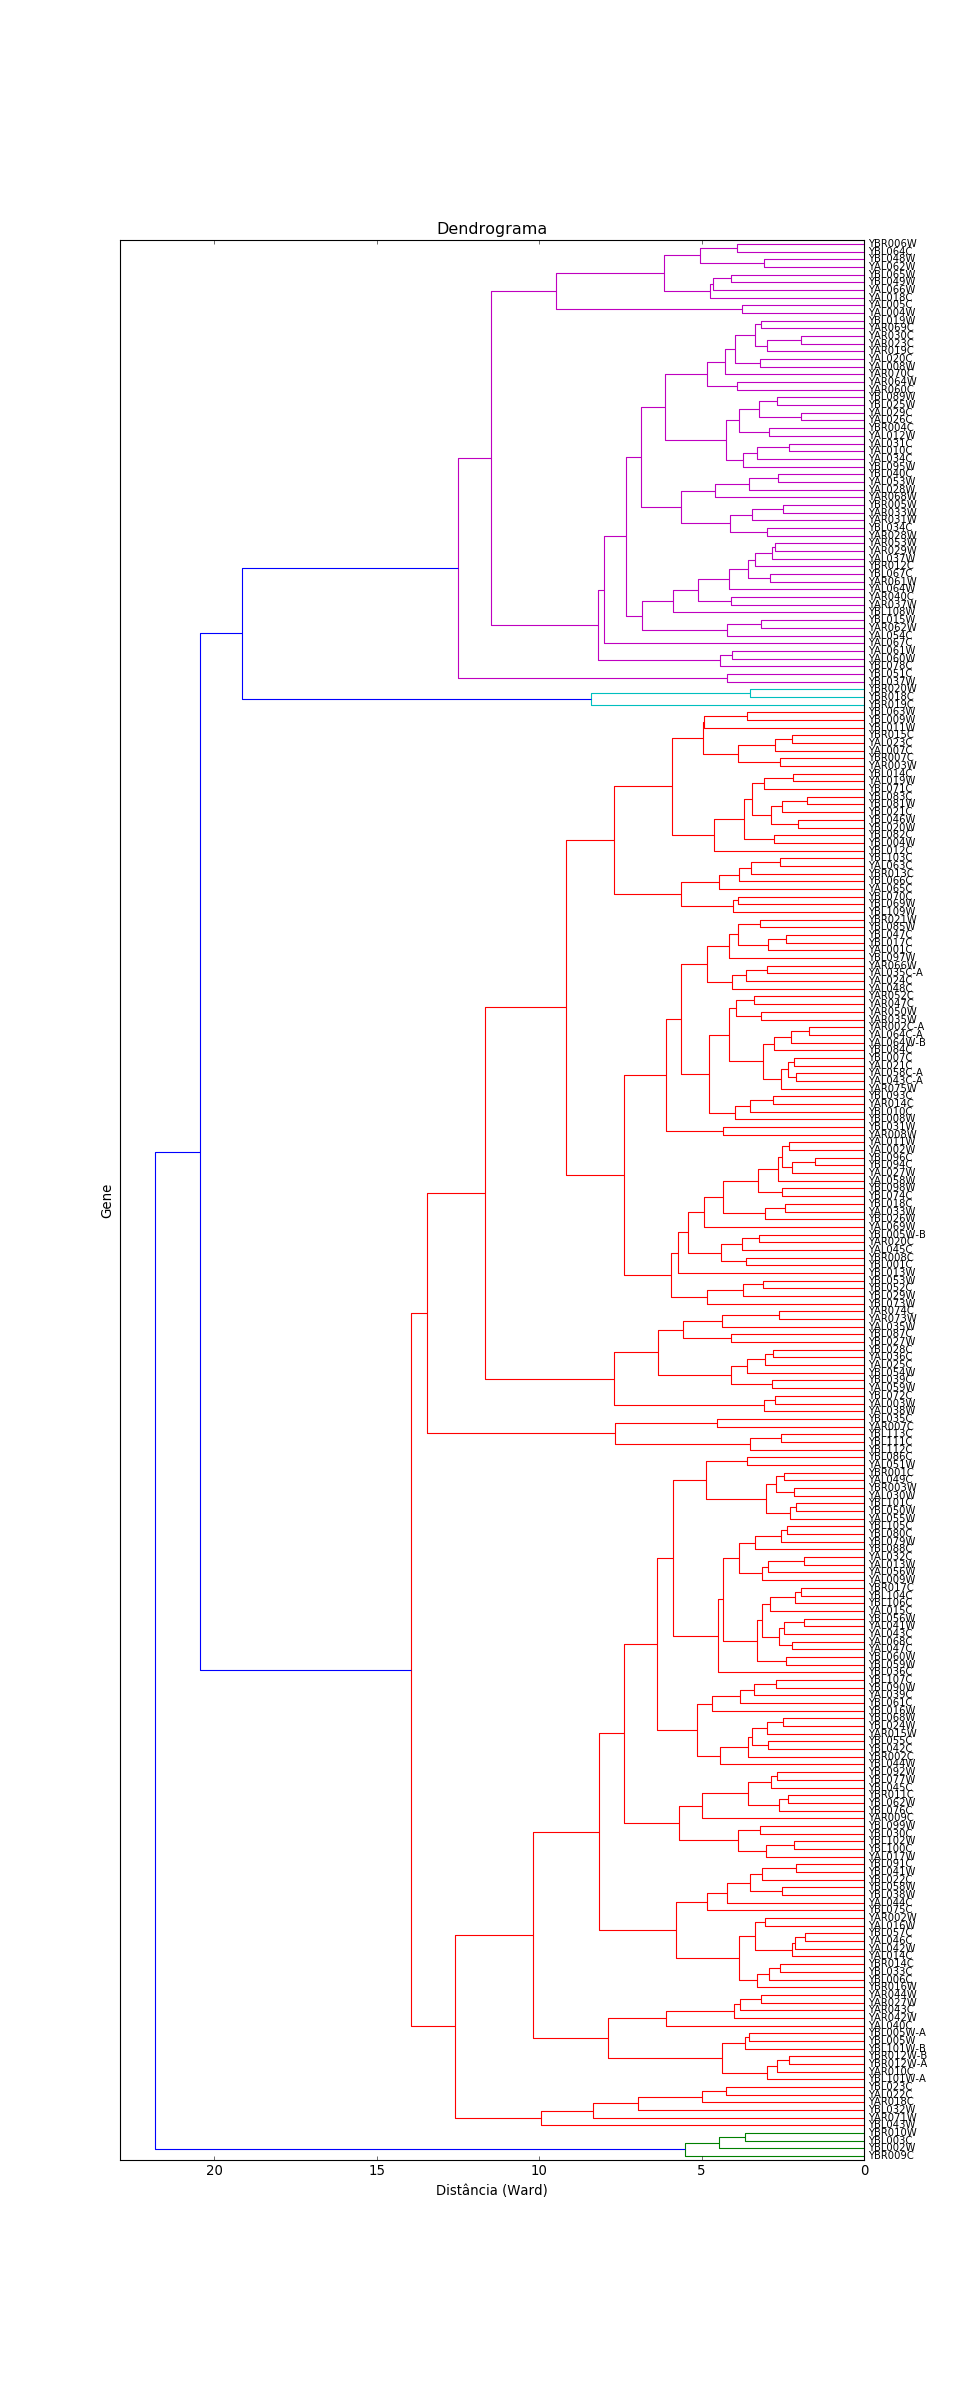

In [16]:
plt.figure(figsize=(12, 30))
plt.title('Dendrograma')
plt.ylabel('Gene')
plt.xlabel(u'Distância (Ward)')
den = dendrogram(Z, orientation='left', leaf_font_size=9, leaf_label_func=llf)

## Heatmap de genes aglomerados

In [17]:
import seaborn as sns

<IPython.core.display.Javascript object>


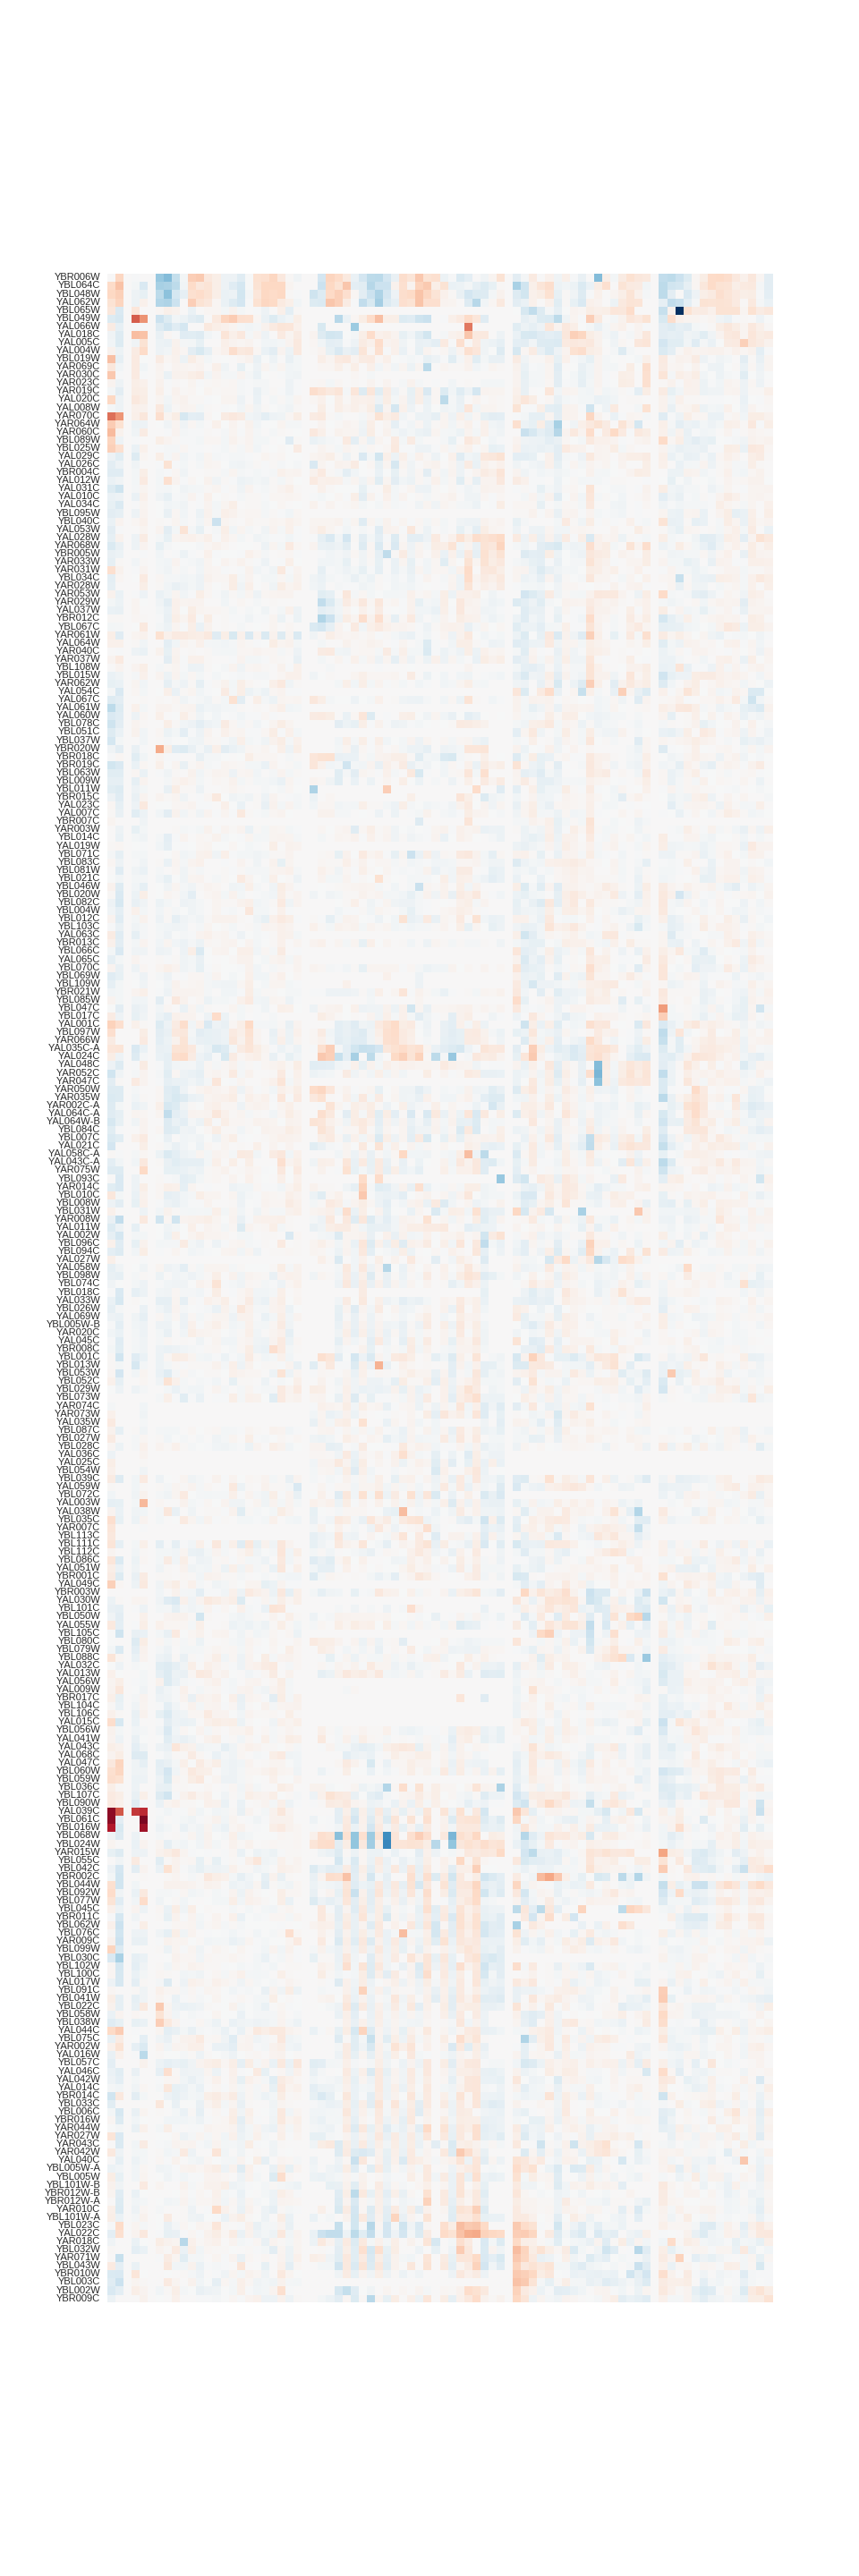

In [18]:
plt.figure(2, figsize=(12,36))
hm = sns.heatmap(X[den['leaves'],:], square=True, cbar=False, xticklabels=False)
gene_labels = [genes[i] for i in den['leaves']]
ylabels = hm.set_yticklabels(gene_labels, rotation=0)